In [819]:
import random

In [820]:
random.uniform(-0.5, 0.5)  # for bias
[random.uniform(-0.5, 0.5) for _ in range(5)]  # for weights

-0.29477311367245673

[-0.10857870228738387,
 -0.47624523354996795,
 -0.37665413721369645,
 0.33642288912342455,
 0.49738425914835627]

In [821]:
def step(value, threshold=0):
  return 1 if value >= threshold else 0

In [822]:
class Perceptron:
  def __init__(self, n_inputs, learning_rate=0.1):
    self.weights = [random.uniform(-0.5, 0.5) for _ in range(n_inputs)]
    self.bias = random.uniform(-0.5, 0.5)
    self.learning_rate = learning_rate

  def run(self, inputs):
    weighted_sum = sum(w * x for w, x in zip(self.weights, inputs))
    total = weighted_sum + self.bias
    return step(total, threshold=0)

  def train(self, training_data, epochs=100):
    print(f"Initial weights: {[round(w, 3) for w in self.weights]}")
    print(f"Initial bias: {round(self.bias, 3)}")

    for epoch in range(1, epochs + 1):
      total_error = 0

      for inputs, target in training_data:
        prediction = self.run(inputs)
        error = target - prediction  # 0, +1, or -1

        # Update each weight
        for i in range(len(self.weights)):
          self.weights[i] += self.learning_rate * error * inputs[i]

        # Update bias
        self.bias += self.learning_rate * error

        total_error += abs(error)

      if epoch <= 5 or epoch % 10 == 0 or epoch == epochs:
        print(f"{epoch=}, {total_error=}")

      if total_error == 0:
        print(f"✅ Convergence reached, {epoch=}, {total_error=}")
        break
    else:
      print(f"💀 Convergence NOT reached, {epoch=}, {total_error=}")

    print(f"Final weights: {[round(w, 3) for w in self.weights]}")
    print(f"Final bias: {round(self.bias, 3)}")

  def test(self, test_data):
    correct = 0
    for inputs, target in test_data:
      prediction = self.run(inputs)
      if prediction == target:
        correct += 1

    accuracy = correct / len(test_data) * 100
    print(f"🎯 Accuracy: {correct}/{len(test_data)} = {accuracy:.1f}%")


and_data = [
    ([0, 0], 0),
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1),
]
perceptron = Perceptron(n_inputs=2, learning_rate=0.1)
perceptron.train(and_data, epochs=50)
perceptron.test(and_data)

Initial weights: [0.316, -0.127]
Initial bias: -0.013
epoch=1, total_error=2
epoch=2, total_error=1
epoch=3, total_error=2
epoch=4, total_error=2
epoch=5, total_error=3
✅ Convergence reached, epoch=8, total_error=0
Final weights: [0.216, 0.173]
Final bias: -0.313
🎯 Accuracy: 4/4 = 100.0%


In [823]:
or_data = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 1),
]
perceptron = Perceptron(n_inputs=2, learning_rate=0.1)
perceptron.train(or_data, epochs=50)
perceptron.test(or_data)

Initial weights: [-0.254, -0.305]
Initial bias: -0.24
epoch=1, total_error=3
epoch=2, total_error=2
epoch=3, total_error=2
epoch=4, total_error=2
epoch=5, total_error=1
✅ Convergence reached, epoch=6, total_error=0
Final weights: [0.046, 0.095]
Final bias: -0.04
🎯 Accuracy: 4/4 = 100.0%


In [824]:
#  SCENARIO 3: Real-valued data — Loan Approval
#
#  Should a bank approve a loan?
#
#  Inputs (normalised/scaled so all values are in similar range):
#    income_lakhs   : annual income in lakhs (e.g. 5.0, 12.0)
#    credit_score   : divided by 100 to bring to same scale (e.g. 3.0 = 300, 7.5 = 750)
#    existing_loans : number of existing loans (e.g. 0, 1, 2, 3)
#
#  Label:
#    1 = approve
#    0 = reject
#
#  The pattern: high income + high credit score = approve
#               low income or low credit score  = reject
#  This IS linearly separable → will converge

In [825]:
loan_data = [
    # income, credit_score/100, existing_loans, label
    ([3.0,  4.0,  2],  0),   # low income, bad credit → reject
    ([2.0,  3.5,  3],  0),   # very low income        → reject
    ([4.0,  4.5,  1],  0),   # below average          → reject
    ([1.5,  3.0,  2],  0),   # poor profile           → reject
    ([5.0,  3.8,  3],  0),   # ok income, bad credit  → reject
    ([8.0,  7.5,  0],  1),   # good income, great credit → approve
    ([10.0, 8.0,  1],  1),   # high income            → approve
    ([7.0,  7.0,  0],  1),   # solid profile          → approve
    ([12.0, 9.0,  0],  1),   # excellent              → approve
    ([6.0,  7.2,  1],  1),   # decent                 → approve
]

In [826]:
perceptron = Perceptron(n_inputs=3, learning_rate=0.1)
perceptron.train(loan_data, epochs=50)
perceptron.test(loan_data)

Initial weights: [0.004, -0.395, -0.283]
Initial bias: -0.028
epoch=1, total_error=1
epoch=2, total_error=3
epoch=3, total_error=3
epoch=4, total_error=3
epoch=5, total_error=1
✅ Convergence reached, epoch=6, total_error=0
Final weights: [0.804, -0.345, -1.383]
Final bias: -0.328
🎯 Accuracy: 10/10 = 100.0%


In [827]:
#  SCENARIO 4: XOR gate  (NOT linearly separable → will FAIL)

xor_data = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 0),   # ← this is the problem point
]
perceptron = Perceptron(n_inputs=2, learning_rate=0.1)
perceptron.train(xor_data, epochs=50)
perceptron.test(xor_data)

Initial weights: [0.441, 0.27]
Initial bias: -0.411
epoch=1, total_error=2
epoch=2, total_error=2
epoch=3, total_error=3
epoch=4, total_error=2
epoch=5, total_error=3
epoch=10, total_error=2
epoch=20, total_error=4
epoch=30, total_error=4
epoch=40, total_error=4
epoch=50, total_error=4
💀 Convergence NOT reached, epoch=50, total_error=4
Final weights: [-0.159, -0.03]
Final bias: 0.089
🎯 Accuracy: 2/4 = 50.0%


In [852]:
#  SCENARIO 5: Inputs: [study_hours, sleep_hours] → pass exam (1) or fail (0)

exam_data = [
    ([8.0, 7.0], 1),   # studied a lot, slept well   → pass
    ([7.0, 6.0], 1),
    ([9.0, 8.0], 1),
    ([6.0, 7.0], 1),
    ([2.0, 4.0], 0),   # barely studied, poor sleep  → fail
    ([1.0, 3.0], 0),
    ([3.0, 3.0], 0),
    # Overlapping / contradictory points below:
    ([5.0, 6.0], 1),   # moderate study → pass
    ([5.0, 6.0], 0),   # same input, different label! ← impossible to learn
    ([4.0, 5.0], 1),
]

perceptron = Perceptron(n_inputs=2, learning_rate=0.1)
perceptron.train(exam_data, epochs=50)
perceptron.test(exam_data)

Initial weights: [-0.453, -0.452]
Initial bias: -0.408
epoch=1, total_error=5
epoch=2, total_error=5
epoch=3, total_error=4
epoch=4, total_error=5
epoch=5, total_error=4
epoch=10, total_error=5
epoch=20, total_error=5
epoch=30, total_error=5
epoch=40, total_error=5
epoch=50, total_error=5
💀 Convergence NOT reached, epoch=50, total_error=5
Final weights: [1.547, -0.352]
Final bias: -2.608
🎯 Accuracy: 8/10 = 80.0%


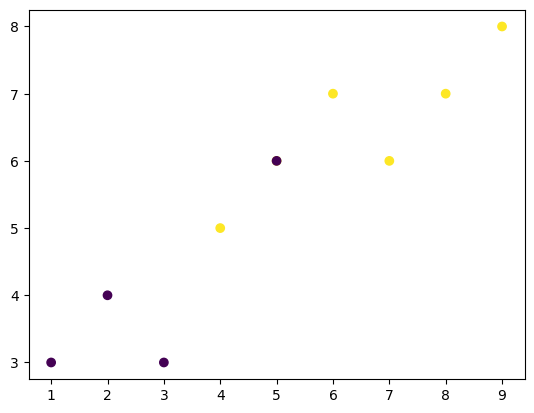

In [858]:
import matplotlib.pyplot as plt
import numpy as np
exam_data = [
    ([8.0, 7.0], 1),   # studied a lot, slept well   → pass
    ([7.0, 6.0], 1),
    ([9.0, 8.0], 1),
    ([6.0, 7.0], 1),
    ([2.0, 4.0], 0),   # barely studied, poor sleep  → fail
    ([1.0, 3.0], 0),
    ([3.0, 3.0], 0),
    # Overlapping / contradictory points below:
    ([5.0, 6.0], 1),   # moderate study → pass
    ([5.0, 6.0], 0),   # same input, different label! ← impossible to learn
    ([4.0, 5.0], 1),
]

inputs = np.array([inputs for inputs, target in exam_data])
target = np.array([target for inputs, target in exam_data])

_ = plt.scatter(inputs[:, 0], inputs[:, 1], c=target)